In [1]:
#Import required libraries 
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.preprocessing import normalize #machine learning algorithm library
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout, LSTM
from keras.utils.vis_utils import plot_model
import math
from sklearn.metrics import r2_score
import yfinance as yf
from datetime import date as dt
import datetime
import pandas_ta as ta

In [2]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "NDAQ",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "4y",
        ## yyyy - mm - dd
#         start = datetime.datetime(1995,9,28),
#         end = datetime.datetime(1999,9,27),
#         start = datetime.datetime(2009,1,1),
#         end = datetime.datetime(2010,1,1),

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2017-10-02,72.485854,72.625843,72.000565,72.597847,693100
2017-10-03,72.439173,72.793807,72.000543,72.560493,856900
2017-10-04,72.364528,72.467187,71.963229,72.392525,678600
2017-10-05,72.541833,72.859136,72.252519,72.467171,708200
2017-10-06,72.541841,72.653827,68.790155,68.967476,2600800
...,...,...,...,...,...
2021-09-23,195.419998,196.729996,195.259995,195.580002,745800
2021-09-24,194.910004,197.130005,194.389999,196.779999,662500
2021-09-27,196.639999,196.639999,194.520004,195.779999,896500


In [3]:
data=data.drop(columns=['Volume'])
data

,Open,High,Low,Close
Date,,,,
2017-10-02,72.485854,72.625843,72.000565,72.597847
2017-10-03,72.439173,72.793807,72.000543,72.560493
2017-10-04,72.364528,72.467187,71.963229,72.392525
2017-10-05,72.541833,72.859136,72.252519,72.467171
2017-10-06,72.541841,72.653827,68.790155,68.967476
...,...,...,...,...
2021-09-23,195.419998,196.729996,195.259995,195.580002
2021-09-24,194.910004,197.130005,194.389999,196.779999
2021-09-27,196.639999,196.639999,194.520004,195.779999


In [4]:
# #Reading data 
step=7
## here
num_input=4
output_cluster=10 #output cluster
num_output=1 #numb of output
num_var=num_input+num_output
data.insert(num_input, "output", True)
num_line = len(data.index)

## here
col_names=list(data)[0:5]

## here
# 1st row 5th col = 5th row 4th col  
for i in range(num_line-step):
    data.iloc[i,4]=data.iloc[i+step,3]
     
for i in range(step):
#     print(data.index[num_line-(1+i)])
    temp_date = data.index[num_line-(1+i)]
    data = data.drop(temp_date)

num_line = len(data.index)
    
data_test=data
test_num_line = len(data_test.index)
data_train=data
train_num_line=len(data_train.index)
data_train

,Open,High,Low,Close,output
Date,,,,,
2017-10-02,72.485854,72.625843,72.000565,72.597847,70.582
2017-10-03,72.439173,72.793807,72.000543,72.560493,69.9101
2017-10-04,72.364528,72.467187,71.963229,72.392525,69.3781
2017-10-05,72.541833,72.859136,72.252519,72.467171,69.1635
2017-10-06,72.541841,72.653827,68.790155,68.967476,69.7234
...,...,...,...,...,...
2021-09-14,194.580002,196.570007,194.580002,195.550003,195.58
2021-09-15,195.589996,197.139999,194.500000,195.839996,196.78
2021-09-16,196.000000,196.460007,194.559998,195.429993,195.78


C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Normal Density')

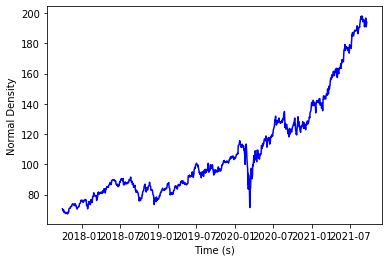

In [5]:
from matplotlib import pyplot as plt
time=[0]*len(data)
for i in range(len(data)):
    time[i]=i

plt.plot(data.index, data['output'], 'b')

plt.xlabel("Time (s)")
plt.ylabel("Normal Density")

In [6]:
## yager network ##

In [7]:
learningConst = 0.0018 #float(1/train_num_line)
mlvq_lwidth=1.5
pfkp_lwidth=0.2
epsilon = 0.0005
discreteSamplePoints=50

In [8]:
def dct(nw,data,ndx):
    e1=0
    le1=0
    e2=0
    le2=0
    neighbours = 0
    iterations=0
    min1=max1=data[0]
    
    for k in range(train_num_line):
        max1=max(max1,data[k])
        min1=min(min1,data[k])
    for j in range(1,nw.num_layers):
        lyr=nw.layers[j]
        for i in range(lyr.dim):
            lyr.neus[i].value=min1+(i+0.5)/(lyr.dim)*(max1-min1)
    
    neighbours = int(nw.layers[2].dim/5);
    interval = (max1-min1)/nw.layers[2].dim;
    
    for j in range(nw.layers[1].dim): 
        lyr = nw.layers[2]
        for i in range(lyr.dim):
            lyr.neus[i].wt[j]=0
    
    while(1):
        for k in range(train_num_line):
            winner1=findWinner(data[k],nw.layers[1])
            e1+= math.fabs(data[k]-nw.layers[1].neus[winner1].value)
            nw.layers[1].neus[winner1].value *= (1-learningConst)
            nw.layers[1].neus[winner1].value += learningConst*data[k];
            
            
            lyr = nw.layers[2];
            winner2 = findWinner(data[k], lyr);
            diff = math.fabs(data[k]-lyr.neus[winner2].value);
            lyr.neus[winner2].wt[winner1] += learningConst*(1-diff/interval)
            e2 += diff;
            
            
            i=(winner2-1)
            for l in range(2,neighbours+2):
                if i>=0:
                    diff = math.fabs(data[k]-lyr.neus[i].value)
                    lyr.neus[i].wt[winner1] += learningConst/l*(1-diff/(l*interval));
                i=i-1
                
            i=(winner2+1)
            for l in range(2,neighbours+2):
                if i<lyr.dim:
                    diff = math.fabs(data[k]-lyr.neus[i].value)
                    lyr.neus[i].wt[winner1] += learningConst/l*(1-diff/(l*interval));
                i=i+1
                
            max2 = 0
            for i in range(lyr.dim):
                max2= max(max2,lyr.neus[i].wt[winner1]);
                
                
            for i in range(lyr.dim):
                lyr.neus[i].wt[winner1] = lyr.neus[i].wt[winner1]/max2
                
        iterations=iterations+1
        
        if (math.fabs(e1-le1) <= epsilon) and (math.fabs(e2-le2) <= epsilon):
            print("No. of iterations =", iterations);
            break;
        le1 = e1
        e1 = 0
        le2 = e2
        e2 = 0
     
        
    return nw

In [9]:
def mlvq(nw,data,ndx):
    e=0
    le=0
    iterations=0
    min2=0
    widthFactor=0
    interval=0
    temp=0
    min1=max1=data[0]
    
    for k in range(train_num_line):
        max1=max(max1,data[k])
        min1=min(min1,data[k])
    for j in range(1,nw.num_layers):
        lyr=nw.layers[j]
        for i in range(lyr.dim):
            lyr.neus[i].value=min1+(i+0.5)/(lyr.dim)*(max1-min1)
    
    
    while(1):
        for k in range(train_num_line):
            winner1=findWinner(data[k],nw.layers[1])
            nw.layers[1].neus[winner1].value *= (1-learningConst)
            nw.layers[1].neus[winner1].value += learningConst*data[k];
            e+= math.fabs(data[k]-nw.layers[1].neus[winner1].value)
            
        iterations=iterations+1
        
        if (math.fabs(e-le) <= epsilon):
            print("No. of iterations =", iterations);
            break;
            
        le = e
        e = 0
        
    lyr=nw.layers[1]
    for j in range(lyr.dim):
        if (j==lyr.dim-1):
            widthFactor = math.fabs(lyr.neus[j].value - lyr.neus[j-1].value)/mlvq_lwidth
        elif (j==0):
            widthFactor = math.fabs(lyr.neus[j].value - lyr.neus[j+1].value)/mlvq_lwidth
        else:
            min2=min(math.fabs(lyr.neus[j].value - lyr.neus[j-1].value), math.fabs(lyr.neus[j].value-lyr.neus[j+1].value))
            widthFactor=min2/mlvq_lwidth
        
        interval=(max1-min1)/nw.layers[2].dim
        cur=min1
        
        for i in range(nw.layers[2].dim):
            temp=0-pow(cur-lyr.neus[j].value,2)/widthFactor
            nw.layers[2].neus[i].wt[j]=math.exp(temp)
            cur += interval
            
    return nw

In [10]:
def pfkp(nw,data,ndx):
    e=0
    le=0
    iterations=0
    min2=0
    widthFactor=0
    interval=0
    temp=0
    min1=max1=data[0]
    
    for k in range(train_num_line):
        max1=max(max1,data[k])
        min1=min(min1,data[k])
    for j in range(1,nw.num_layers):
        lyr=nw.layers[j]
        for i in range(lyr.dim):
            lyr.neus[i].value=min1+(i+0.5)/(lyr.dim)*(max1-min1)
    
    alpha=[0]*nw.layers[1].dim
    beta=[0]*nw.layers[1].dim
    sigma=[0]*nw.layers[1].dim
    tau=[0]*nw.layers[1].dim
    phi=[0]*nw.layers[1].dim
    
    
    while(1):
        for k in range(train_num_line):
            winner1=findWinner(data[k],nw.layers[1])
            nw.layers[1].neus[winner1].value *= (1-learningConst)
            nw.layers[1].neus[winner1].value += learningConst*data[k];
            e+= math.fabs(data[k]-nw.layers[1].neus[winner1].value)
            
        iterations=iterations+1
        
        if (math.fabs(e-le) <= epsilon):
            print("No. of iterations =", iterations);
            break;
            
        le = e
        e = 0
        
    le = 0 
    e = 0
    lyr = nw.layers[1]
    for j in range(lyr.dim):
        phi[j] = alpha[j] = beta[j] = sigma[j] = tau[j] = lyr.neus[j].value;
        
    for k in range(train_num_line):
        winner= findWinner(data[k], nw.layers[1])
        phi[winner] *= (1-pfkp_lwidth);
        phi[winner] += pfkp_lwidth*data[k];
        if(winner):
            alpha[winner]=sigma[winner-1]
        else:
            alpha[winner] = min(alpha[winner],data[k])
        beta[winner]= min(beta[winner],phi[winner])
        sigma[winner]= max(sigma[winner],phi[winner])
        if(winner == nw.layers[1].dim - 1):
            tau[winner]= max(tau[winner],data[k])
        else:
            tau[winner] = beta[winner+1]
            
    lyr=nw.layers[2]
    for j in range(nw.layers[1].dim):
        for i in range(lyr.dim):
            if(lyr.neus[i].value <= alpha[j] or lyr.neus[i].value >=tau[j]):
                lyr.neus[i].wt[j]=0
            elif(lyr.neus[i].value < beta[j]):
                slope = 1/(beta[j]-alpha[j])
                lyr.neus[i].wt[j] = slope * (lyr.neus[i].value - alpha[j])
            elif(lyr.neus[i].value >= beta[j] and lyr.neus[i].value <=sigma[j]):
                lyr.neus[i].wt[j]=1
            else: 
                slope = 1/(sigma[j]-tau[j])
                lyr.neus[i].wt[j]= slope * (lyr.neus[i].value - tau[j]) 
            
    return nw

In [11]:
def buildConnections(source, dest, start, step, size): #layer2->layer3, 0-3
    i=k=st=start
    for i in range(dest.dim):
        currneu=dest.neus[i]
        #newneu=[None]*8
        newneu=[neuron]*(output_cluster+1)
        newwt=[0]*(output_cluster+1)
        for k in range(currneu.num_inputs):
            newneu[k] = currneu.input[k]
            newwt[k] = currneu.wt[k]
        currneu.input=newneu
        currneu.wt = newwt
        k=st
        for k in range(st+size):
            currneu.input[currneu.num_inputs]=source.neus[k]
            currneu.wt[currneu.num_inputs]=0
            currneu.num_inputs+=currneu.num_inputs
        st+=step
    return

In [12]:
import csv
def printCluster(nw,ndx):
        
    f = open("cluster_dct.txt", "a")
    f.write(" ")
    f.write(str(nw.layers[2].dim))
    f.write("\n ")
    
    if ndx == 0:
        with open('cluster_dct.csv', 'w', newline='') as csvfile:
            spamwriter = csv.writer(csvfile, delimiter=' ')
            
            fd = open("mf_dct.txt", "a")
            print(nw.layers[2].dim)
            val=[]*nw.layers[2].dim
            for j in range(nw.layers[2].dim):
                val.append(round(nw.layers[2].neus[j].value,6))
                f.write(str(val[j]))
                f.write(" ")
                fd.write(str(val[j]))
                fd.write("\n")
            f.write("\n ")
            spamwriter.writerow(str(val))

            i=0
            wt=[0]*nw.layers[1].dim*nw.layers[2].dim
            for j in range(nw.layers[1].dim):
                for k in range(nw.layers[2].dim):
                    wt[i]=nw.layers[2].neus[k].wt[j]
                    f.write(str(round(wt[i],6)))
                    f.write(" ")
                    fd.write(str(round(wt[i],6)))
                    fd.write("\n")
                    i=i+1
                f.write("\n ")
            f.close()   
            fd.close()
            spamwriter.writerow(str(wt))
        
    else:
        with open('cluster_dct.csv', 'a', newline='') as csvfile:
            spamwriter = csv.writer(csvfile, delimiter=' ')
        
            fd = open("mf_dct.txt", "a")
            print(nw.layers[2].dim)
            val=[]*nw.layers[2].dim
            for j in range(nw.layers[2].dim):
                val.append(round(nw.layers[2].neus[j].value,6))
                f.write(str(val[j]))
                f.write(" ")
                fd.write(str(val[j]))
                fd.write("\n")
            f.write("\n ")
            spamwriter.writerow(str(val))

            i=0
            wt=[0]*nw.layers[1].dim*nw.layers[2].dim
            for j in range(nw.layers[1].dim):
                for k in range(nw.layers[2].dim):
                    wt[i]=nw.layers[2].neus[k].wt[j]
                    f.write(str(round(wt[i],6)))
                    f.write(" ")
                    fd.write(str(round(wt[i],6)))
                    fd.write("\n")
                    i=i+1
                f.write("\n ")
            f.close()   
            fd.close()
            spamwriter.writerow(str(wt))

    return

In [13]:
def findWinner(value,lyr):
    winner=0
    error=math.fabs(value-lyr.neus[0].value)
    for i in range(1,lyr.dim):
        temp=min(error, math.fabs(value-lyr.neus[i].value))
        if temp<error:
            error=temp
            winner=i
    return winner

In [14]:
#return network 
def initNN(ndx):
    x=[]
    nw=network(3)
    cent_lyr=output_cluster
    
#########################  LAYER 1: INPUT LAYER  #############################
    layer1=layer(1,0,x) #numofneurons, not ipneu, data
    nw.addLayers(0,layer1) #(layernum, layer)
    
#######################  LAYER 2: CENTROID LAYER  #############################
    layer2=layer(cent_lyr,0,x) 
    nw.addLayers(1,layer2)
#   for i in range(1):
    buildConnections(layer1,layer2,0,0,1)
    
#######################  LAYER 3: MEMBERSHIP LAYER  #############################
    layer3=layer(discreteSamplePoints,0,x)
    nw.addLayers(2,layer3) 
    for i in range(cent_lyr):
        buildConnections(layer2,layer3,i,0,1)
    f = open("cluster_dct.txt", "a")
    f.write(col_names[ndx])
    f.close()
    print(col_names[ndx])
#     nw=mlvq(nw, data_train.iloc[:,ndx],ndx)
    nw=dct(nw, data_train.iloc[:,ndx],ndx)
#     nw=pfkp(nw, data_train.iloc[:,ndx],ndx)

    printCluster(nw,ndx)
    return 

In [15]:
class network():
  def __init__(self,dim):
    self.num_layers=dim
    self.layers = [layer]*dim
  def addLayers(self,i,layer):
    self.layers[i]=layer

In [16]:
class layer(network):
  def __init__(self,dim,neu,x):
    self.dim = dim
    self.neus = [neuron]*dim
    self.ipneus=[ipneuron]*dim
    self.count=0
    for i in range(dim):
        if neu == 0:
            self.neus[i]=neuron(dim)
        elif neu==1:
            self.ipneus[i]=ipneuron(dim,i,x)

In [17]:
class neuron(layer):
  def __init__(self,dim):
    self.name = None
    self.value = 0
    self.num_inputs = 0
    self.input = [neuron]*(output_cluster*num_var)
    self.wt= [0]*(output_cluster*num_var)
    self.combFunc=-1
    self.actFunc=-1
    self.activation=0
    self.ip_type=1
    self.ipneu_input = [ipneuron]
    self.actFunc_arg=[0]

In [18]:
class ipneuron(layer):
  def __init__(self,dim,count,x):
    self.numPt=discreteSamplePoints
    self.ip_value=0
    self.value=[0]*output_cluster #num_pattern
    self.name=col_names[count]
    self.mf = [[0 for i in range(discreteSamplePoints)] for j in range(output_cluster+1)]
    self.cluster=0
    for i in range(output_cluster+1):
        for j in range(discreteSamplePoints):
            self.mf[i][j]=x[(discreteSamplePoints*i)+j+(count*(discreteSamplePoints*(output_cluster+1)))]
    if(count==num_input-1):
        count=count+1
        for i in range(output_cluster+1):
            for j in range(discreteSamplePoints):
                Outmf[i][j]=x[(discreteSamplePoints*i)+j+(count*(discreteSamplePoints*(output_cluster+1)))]

In [19]:
def findWinner1(value,pt,numPt):
    winner=0
    error=math.fabs(value-pt[0])
    for i in range(1,numPt):
        temp=min(error, math.fabs(value-pt[i]))
        if temp<error:
            error=temp
            winner=i
    return winner

In [20]:
def initNN1(x):
    nw = network(6)
    nw.num_feature=num_input #input
    nw.num_pattern=output_cluster #out
    
#########################  LAYER 1: INPUT LAYER  #############################
    
    # create input layer
    lyr=layer(num_input,1,x) #dim,input neu, dataset
    nw.addLayers(0,lyr)
    
#     print("layer 1 with ",nw.layers[0].dim," neurons\n");
#     for j in range(nw.layers[0].dim):
#         print("membership function of")
#         print(nw.layers[0].ipneus[j].mf,"\n")
        
        
#     print("membership function of \n")
#     print(Outmf,"\n") 

#######################  LAYER 2: ANTECEDENT LAYER  #############################
    
    # create antecedent layer
    lyr=layer(num_input*output_cluster,0,x) #dim, not input neu, dataset
    nw.addLayers(1,lyr)
    
    # make connections between antecedent and input layers
    for i in range(num_input):
        for j in range(output_cluster):
            neu = lyr.neus[i*output_cluster+j]
            neu.ip_type=0
            neu.ipneu_input[0]=nw.layers[0].ipneus[i]
            neu.wt[0]=1.0
            neu.num_inputs=1
        
    
#######################  LAYER 3: RULE LAYER  #############################
    
    # create rule layer
    lyr=layer(pow(output_cluster,num_var),0,x) #dim, not input neu, dataset
    nw.addLayers(2,lyr)
    

##################  LAYER 4: CONSEQUENT LAYER  #############################
    
    # create output label layer
    lyr = layer(output_cluster,0,x)
    nw.addLayers(3,lyr)

##################  LAYER 5: OUTPUT POSSIBILITY LAYER  #############################
    
    # create output possibility layer
    lyr = layer(output_cluster,0,x)
    nw.addLayers(4,lyr)
    
    yagerTest(nw)
    return

In [21]:
def yagerTest(nw):
    from sklearn.metrics import r2_score
    RMSE=0
    result=[0]*test_num_line
    time=[0]*test_num_line
    ## here change value if num of input change
    train_x = (data_train.iloc[:,[0,1,2,3]]).values
    train_y = (data_train.iloc[:,[4]]).values
    test_x = (data_test.iloc[:,[0,1,2,3]]).values
    test_y = (data_test.iloc[:,[4]]).values
    global outputCluster
    #print(feature)

    ## train - rule creation
    for i in range(train_num_line):
        processRule_train(nw,train_x[i],train_y[i],i)
    inputCluster=processInput_train(nw)
    outputCluster=processOutput_train(nw)
    currentRule=processRule()
    
    ## test - process the dataset using the rules created
    for i in range(test_num_line):
        inputCluster_test=processInput_test(nw,test_x[i],test_y[i],i)
        result[i]=processOutput(inputCluster_test,outputCluster, currentRule)
    
    f = open("result_yagernetwork.txt", "w")
    
    print("\npredicted vs actual output")
    f.write("predicted vs actual output\n")
    for i in range(test_num_line):
        print(" ", '{0:.2f}'.format(result[i]),"  ",'{0:.2f}'.format(test_y[i][0]))
        f.write(str( '{0:.2f}'.format(result[i])))
        f.write("  ")
        f.write(str('{0:.2f}'.format(test_y[i][0])))
        f.write("\n")
        time[i]=i

    from matplotlib import pyplot as plt
    plt.plot(time, result, 'r-')
    plt.plot(time, test_y, 'b-')
    plt.xlabel("Time (s)")
    plt.ylabel("Normal Density")
    
    from sklearn.metrics import mean_squared_error
    rms = mean_squared_error(test_y, result)
    print("RMSE = ",rms)
    f.write("RMSE = ")
    f.write(str(rms))
    TestR2Value = r2_score(test_y,result)
    print("Testing Set R-Square=", TestR2Value)
    f.write("R-Square=")
    f.write(str(TestR2Value))
        
    return

In [22]:
def processOutput(x,outputCluster,currentRule):
    for i in range(len(currentRule)):
#         print("rule: ",currentRule[i],"&& input: ",x)
        if(currentRule[i][0]==x[0] and currentRule[i][1]==x[1] and currentRule[i][2]==x[2]):
#             print("FOUND: rule: ",currentRule[i],"&& input: ",x)
#             print("output cluster: ",currentRule[i][4])
            return outputCluster[currentRule[i][3]]
        elif(i==len(currentRule)-1):
#             print("NOT FOUND: rule: ",currentRule[i],"&& input: ",x)
            return 0

In [23]:
def processRule():
    updatedRule=[[0 for i in range(num_var+1)] for j in range(ruleCount)]
    temp=[[0 for i in range(num_var+1)] for j in range(ruleCount)]
    count=0
    
    for i in range(ruleCount):
        for j in range(num_var+1):
            updatedRule[i][j]=rules[i][j]
#     print("updated", updatedRule)
            
    for i in range(ruleCount):
        tempval=0
        tempindex=0
        for j in range(i+1,ruleCount):
            #here
            if(updatedRule[i][0]==updatedRule[j][0] and updatedRule[i][1]==updatedRule[j][1] and updatedRule[i][2]==updatedRule[j][2] and updatedRule[i][num_var]!=-1):
                if(updatedRule[i][num_var]>updatedRule[j][num_var] and updatedRule[i][num_var]>tempval):
                    tempval=updatedRule[i][num_var]
                    tempindex=i
                elif(updatedRule[j][num_var]>updatedRule[i][num_var] and updatedRule[j][num_var]>tempval):
                    tempval=updatedRule[j][num_var]
                    tempindex=j
        if(tempval!=0 and updatedRule[i][num_var]!=-1):
            temp[count]=updatedRule[tempindex]
            count=count+1
        elif(updatedRule[i][num_var]!=-1):
            temp[count]=updatedRule[i]
            count=count+1
        for j in range(ruleCount):
            updatedRule[i][num_var]=-1
            #here
            if(updatedRule[i][0]==updatedRule[j][0] and updatedRule[i][1]==updatedRule[j][1] and updatedRule[i][2]==updatedRule[j][2]):
                updatedRule[j][num_var]=-1
        
    currentRule=[[0 for i in range(num_var)] for j in range(count)]    
    for i in range(count):
        for j in range(num_var):
            currentRule[i][j]=temp[i][j]
    
#     print("temp", temp)
    print("currentRule", currentRule)
    return currentRule

In [24]:
def processInput_test(nw,x,y,count):
    value=[0]*output_cluster
    inputCluster=[0]*num_input
    
    ##find the similarity score for input value
    for i in range(num_input):
        ipneu=nw.layers[0].ipneus[i]
        ipneu.ip_value=x[i]
        mf=ipneu.mf
        winner=findWinner1(x[i],mf[0],ipneu.numPt)
        for j in range(output_cluster):
            ipneu.value[j] = mf[j+1][winner]
            fuzzytest_ltsm.iloc[count][(i*output_cluster)+j]=mf[j+1][winner]#ipneu.value[j]
            
    ##find the cluster it belongs to for the input value        
    for i in range(num_input):
        temp=0
        for j in range(output_cluster):
            if(nw.layers[0].ipneus[i].value[j]>=temp):
                nw.layers[0].ipneus[i].cluster=j
                temp=nw.layers[0].ipneus[i].value[j]

    for i in range(num_input):
        inputCluster[i]=nw.layers[0].ipneus[i].cluster
#         print("input cluster ",inputCluster[i])

    for i in range(num_input):
        print("test input: ",x[i]," cluster: ",nw.layers[0].ipneus[i].cluster) 

    ##find the similarity score for output value             
    winner=findWinner1(y[0],Outmf[0],ipneu.numPt)
    for j in range(output_cluster):
        value[j] = Outmf[j+1][winner]
    fuzzytest_ltsm.iloc[count][(num_input*output_cluster)]= y[0]

    ##find the cluster it belongs to for the output value             
    temp=0
    for j in range(output_cluster):
        if(value[j]>=temp):
            cluster=j
            temp=value[j]

    print("output cluster ",cluster) 
    
    return inputCluster

In [25]:
def processRule_train(nw,x,y,count):
    value=[0]*output_cluster
    actualValue=[0]*output_cluster
    global ruleCount
    
    ##find the similarity score for input value
    for i in range(num_input):
        ipneu=nw.layers[0].ipneus[i]
        ipneu.ip_value=x[i]
        mf=ipneu.mf
        winner=findWinner1(x[i],mf[0],ipneu.numPt)
        for j in range(output_cluster):
            ipneu.value[j] = mf[j+1][winner]
            fuzzytrain_ltsm.iloc[count][(i*output_cluster)+j]=mf[j+1][winner]#ipneu.value[j]
            
    ##find the cluster it belongs to for the input value        
    for i in range(num_input):
        temp=0
        for j in range(output_cluster):
            if(nw.layers[0].ipneus[i].value[j]>=temp):
                nw.layers[0].ipneus[i].cluster=j
                temp=nw.layers[0].ipneus[i].value[j]
                
    ##find the similarity score for output value             
    winner=findWinner1(y[0],Outmf[0],ipneu.numPt)
    for j in range(output_cluster):
        value[j] = Outmf[j+1][winner]
    fuzzytrain_ltsm.iloc[count][(num_input*output_cluster)]= y[0]
        
    ##find the cluster it belongs to for the output value             
    temp=0
    for j in range(output_cluster):
        if(value[j]>=temp):
            cluster=j
            temp=value[j]

    createNewRule=0
    ##create rules
    for i in range(ruleCount+1):
        sameClusters=0
        for j in range(num_var):
            if(j<num_input): ##check input of rule
                if (rules[i][j]==nw.layers[0].ipneus[j].cluster):
                    sameClusters+=1
            else: ##check ouput of rule
                if(rules[i][j]==cluster):
                    sameClusters+=1
        if (sameClusters==num_var):
            rules[i][num_var]+=1
            break
        elif (i==ruleCount):
            createNewRule=1  
    if createNewRule==1:
        for i in range(num_input):
            rules[ruleCount][i]=nw.layers[0].ipneus[i].cluster
        rules[ruleCount][num_var-1]=cluster
        rules[ruleCount][num_var]=1
        ruleCount+=1

In [26]:
def processOutput_train(nw):
    fuzzyValue=[0]*output_cluster
    
    for k in range(output_cluster):
        tempValue=0
        tempIndex=0
        for j in range(discreteSamplePoints):
            if(Outmf[k+1][j]>tempValue): 
                tempValue=Outmf[k+1][j]
                tempIndex=j
        fuzzyValue[k]=Outmf[0][tempIndex]
                
    return fuzzyValue

In [27]:
def processInput_train(nw):
#     mf=[[0 for i in range(discreteSamplePoints)] for j in range(output_cluster+1)]
    fuzzyValue=[[0 for i in range((output_cluster))] for j in range(num_input)] 
    tempValue=0
    tempIndex=0
    ##find the similarity score for input value
    for i in range(num_input):
        ipneu=nw.layers[0].ipneus[i]
        mf=ipneu.mf
        for k in range(output_cluster):
            tempValue=0
            tempIndex=0
            for j in range(discreteSamplePoints):
                if(mf[k+1][j]>tempValue): 
                    tempValue=mf[k+1][j]
                    tempIndex=j
            fuzzyValue[i][k]=mf[0][tempIndex]
    
    return fuzzyValue

Open
No. of iterations = 107
50
High
No. of iterations = 249
50
Low
No. of iterations = 355
50
Close
No. of iterations = 68
50
output
No. of iterations = 67
50
2750
currentRule [[0, 0, 0, 0, 0], [0, 1, 0, 1, 1], [1, 1, 0, 0, 0], [1, 0, 0, 0, 0], [1, 1, 1, 1, 1], [1, 2, 1, 2, 2], [2, 2, 1, 1, 1], [0, 0, 1, 1, 0], [1, 0, 1, 0, 1], [2, 2, 2, 2, 2], [2, 3, 2, 3, 3], [2, 3, 3, 3, 3], [3, 3, 3, 3, 3], [3, 3, 2, 3, 2], [4, 4, 3, 3, 4], [4, 3, 3, 3, 4], [3, 4, 3, 4, 4], [4, 4, 4, 4, 4], [4, 5, 5, 5, 4], [5, 5, 4, 4, 4], [4, 5, 4, 5, 5], [5, 5, 5, 5, 5], [5, 6, 5, 6, 6], [6, 6, 6, 6, 7], [6, 5, 5, 6, 6], [5, 6, 6, 6, 6], [6, 7, 7, 7, 7], [7, 7, 7, 7, 7], [7, 8, 8, 8, 8], [8, 8, 8, 8, 8], [8, 9, 8, 9, 9], [9, 9, 9, 9, 9]]
test input:  72.48585391465383  cluster:  0
test input:  72.62584347237448  cluster:  0
test input:  72.00056485074225  cluster:  0
test input:  72.59784698486328  cluster:  0
output cluster  0
test input:  72.43917302090834  cluster:  0
test input:  72.7938069530622  cluster: 

test input:  74.86543273925781  cluster:  0
output cluster  0
test input:  74.9873477509998  cluster:  0
test input:  75.34371326516614  cluster:  0
test input:  74.86543492758382  cluster:  0
test input:  75.09050750732422  cluster:  0
output cluster  0
test input:  75.39998441789888  cluster:  0
test input:  75.64381721203245  cluster:  0
test input:  75.12801844654376  cluster:  0
test input:  75.61567687988281  cluster:  0
output cluster  0
test input:  75.67194640504601  cluster:  0
test input:  75.82199239397022  cluster:  0
test input:  74.82791535819825  cluster:  0
test input:  75.22179412841797  cluster:  0
output cluster  0
test input:  75.51250724320488  cluster:  0
test input:  76.26275859391266  cluster:  0
test input:  74.9592024171264  cluster:  0
test input:  76.12208557128906  cluster:  0
output cluster  0
test input:  76.22526463923785  cluster:  0
test input:  76.75981653681154  cluster:  0
test input:  75.82200568809074  cluster:  0
test input:  76.13148498535156  

test input:  85.29353332519531  cluster:  1
output cluster  1
test input:  85.53848983604033  cluster:  1
test input:  85.92472816531885  cluster:  1
test input:  84.82252691951639  cluster:  1
test input:  85.16166687011719  cluster:  1
output cluster  1
test input:  84.84135078234827  cluster:  1
test input:  85.69862306752697  cluster:  1
test input:  84.54931644609135  cluster:  1
test input:  84.73772430419922  cluster:  1
output cluster  1
test input:  84.73771364318529  cluster:  1
test input:  85.4536763510569  cluster:  1
test input:  84.20074340910612  cluster:  1
test input:  85.01091003417969  cluster:  1
output cluster  1
test input:  84.75657704871308  cluster:  1
test input:  85.45369481136164  cluster:  1
test input:  84.49280314864605  cluster:  1
test input:  85.32180786132812  cluster:  1
output cluster  1
test input:  85.16165611905102  cluster:  1
test input:  85.3594865340434  cluster:  1
test input:  84.80367111233203  cluster:  1
test input:  84.85077667236328  

test input:  88.31070709228516  cluster:  1
output cluster  2
test input:  88.34858707363874  cluster:  1
test input:  89.87232870660395  cluster:  1
test input:  88.24447996425842  cluster:  1
test input:  89.65465545654297  cluster:  1
output cluster  1
test input:  89.74928459714026  cluster:  1
test input:  90.63891720574628  cluster:  1
test input:  89.74928459714026  cluster:  1
test input:  89.9291000366211  cluster:  1
output cluster  1
test input:  90.0710558254958  cluster:  1
test input:  90.79033917273715  cluster:  1
test input:  89.9006994332711  cluster:  1
test input:  90.00480651855469  cluster:  1
output cluster  1
test input:  89.966959308917  cluster:  1
test input:  90.27928060145717  cluster:  1
test input:  89.46535632306181  cluster:  1
test input:  89.7682113647461  cluster:  1
output cluster  1
test input:  89.63571388911205  cluster:  1
test input:  89.7303547369878  cluster:  1
test input:  89.23821799565359  cluster:  1
test input:  89.43696594238281  clust

test input:  82.71509552001953  cluster:  1
output cluster  0
test input:  82.48569622255391  cluster:  1
test input:  82.686413720541  cluster:  1
test input:  81.27182388286546  cluster:  1
test input:  81.48210144042969  cluster:  1
output cluster  0
test input:  81.96001273327211  cluster:  1
test input:  82.60039825464851  cluster:  1
test input:  79.74255262214697  cluster:  0
test input:  80.03884887695312  cluster:  0
output cluster  0
test input:  80.27779963841826  cluster:  1
test input:  81.21448871013962  cluster:  1
test input:  78.76763817661579  cluster:  0
test input:  79.34111785888672  cluster:  0
output cluster  0
test input:  79.18817617299928  cluster:  0
test input:  79.52270533823082  cluster:  0
test input:  76.97071633065022  cluster:  0
test input:  77.42950439453125  cluster:  0
output cluster  0
test input:  77.10453013889096  cluster:  0
test input:  78.84408913861297  cluster:  0
test input:  75.96713094550407  cluster:  0
test input:  75.99580383300781  

test input:  85.59519727450332  cluster:  1
test input:  84.64403478787239  cluster:  1
test input:  85.51834106445312  cluster:  1
output cluster  1
test input:  86.08519383536456  cluster:  1
test input:  86.35420889786369  cluster:  1
test input:  85.5087319399935  cluster:  1
test input:  85.79696655273438  cluster:  1
output cluster  1
test input:  85.79697409322418  cluster:  1
test input:  86.11402339897103  cluster:  1
test input:  85.19168281929286  cluster:  1
test input:  85.68167877197266  cluster:  1
output cluster  1
test input:  85.92186730404215  cluster:  1
test input:  85.96990885121056  cluster:  1
test input:  84.72090192594143  cluster:  1
test input:  85.11481475830078  cluster:  1
output cluster  1
test input:  85.13403515299765  cluster:  1
test input:  85.87382660799113  cluster:  1
test input:  84.5383536807158  cluster:  1
test input:  85.27815246582031  cluster:  1
output cluster  1
test input:  84.8746288465005  cluster:  1
test input:  85.3838443670886  cl

test input:  96.78439077215123  cluster:  2
test input:  92.95124873604864  cluster:  2
test input:  94.83403015136719  cluster:  2
output cluster  2
test input:  94.8436853225195  cluster:  2
test input:  95.40368517665021  cluster:  2
test input:  94.09056835369825  cluster:  2
test input:  94.24505615234375  cluster:  2
output cluster  2
test input:  94.41885358280803  cluster:  2
test input:  94.99816810931964  cluster:  2
test input:  94.02298411375506  cluster:  2
test input:  94.6795425415039  cluster:  2
output cluster  2
test input:  94.70850176967082  cluster:  2
test input:  94.83402494362936  cluster:  2
test input:  93.09607409667876  cluster:  2
test input:  93.33745574951172  cluster:  2
output cluster  2
test input:  93.01882584550101  cluster:  2
test input:  93.73332080823612  cluster:  2
test input:  92.65192840226794  cluster:  2
test input:  93.46297454833984  cluster:  2
output cluster  2
test input:  93.63677763114428  cluster:  2
test input:  93.70436420189722  

test input:  97.3954603114385  cluster:  2
test input:  95.20287190919474  cluster:  2
test input:  97.07530212402344  cluster:  2
output cluster  2
test input:  96.76484899752974  cluster:  2
test input:  97.24023809487805  cluster:  2
test input:  96.01782061883763  cluster:  2
test input:  96.79395294189453  cluster:  2
output cluster  2
test input:  97.4633714147665  cluster:  2
test input:  97.4633714147665  cluster:  2
test input:  95.72676454981801  cluster:  2
test input:  96.27006530761719  cluster:  2
output cluster  2
test input:  96.75515640496384  cluster:  2
test input:  96.80366051353164  cluster:  2
test input:  95.59094677207767  cluster:  2
test input:  95.64915466308594  cluster:  2
output cluster  2
test input:  95.96930788350008  cluster:  2
test input:  96.10513122334412  cluster:  2
test input:  94.97973677866247  cluster:  2
test input:  95.48422241210938  cluster:  2
output cluster  2
test input:  95.23198053274649  cluster:  2
test input:  97.09470691239606  c

test input:  104.44573751210186  cluster:  2
test input:  105.07921600341797  cluster:  3
output cluster  3
test input:  104.26057724896711  cluster:  2
test input:  105.7224473271691  cluster:  3
test input:  104.02667268292667  cluster:  2
test input:  105.52752685546875  cluster:  3
output cluster  3
test input:  105.04997537915297  cluster:  2
test input:  105.50802915263543  cluster:  3
test input:  104.17285192306475  cluster:  2
test input:  105.45929718017578  cluster:  3
output cluster  3
test input:  105.25463610110259  cluster:  2
test input:  105.50802897364377  cluster:  3
test input:  103.68556176438864  cluster:  2
test input:  103.71479797363281  cluster:  2
output cluster  3
test input:  103.80251570893564  cluster:  2
test input:  104.24107372557278  cluster:  2
test input:  102.56479497099099  cluster:  2
test input:  103.13980102539062  cluster:  2
output cluster  3
test input:  103.56860666833197  cluster:  2
test input:  105.14742884356838  cluster:  3
test input:

test input:  105.4809033583971  cluster:  2
test input:  106.59720640412179  cluster:  3
test input:  102.5824316369709  cluster:  2
test input:  103.08182525634766  cluster:  2
output cluster  3
test input:  106.2447072395686  cluster:  2
test input:  106.2447072395686  cluster:  3
test input:  100.66319104572136  cluster:  2
test input:  102.45514678955078  cluster:  2
output cluster  3
test input:  104.74649476742654  cluster:  2
test input:  104.74649476742654  cluster:  3
test input:  100.68275625985743  cluster:  2
test input:  101.69134521484375  cluster:  2
output cluster  3
test input:  102.59221704294613  cluster:  2
test input:  103.55184976527858  cluster:  2
test input:  100.82963684857495  cluster:  2
test input:  103.43434143066406  cluster:  2
output cluster  3
test input:  104.88358835829209  cluster:  2
test input:  109.56422902176026  cluster:  3
test input:  104.7758742450484  cluster:  2
test input:  109.30963134765625  cluster:  3
output cluster  2
test input:  11

test input:  127.43622164321116  cluster:  4
test input:  130.64154052734375  cluster:  4
output cluster  4
test input:  131.27079277993008  cluster:  4
test input:  131.27079277993008  cluster:  4
test input:  128.38011444794026  cluster:  4
test input:  129.32400512695312  cluster:  4
output cluster  4
test input:  129.78612199873643  cluster:  4
test input:  130.07125157459134  cluster:  4
test input:  127.93764818753249  cluster:  4
test input:  128.2817840576172  cluster:  4
output cluster  4
test input:  128.95037262554857  cluster:  4
test input:  130.8185152101212  cluster:  4
test input:  128.05564636436628  cluster:  4
test input:  128.2326202392578  cluster:  4
output cluster  4
test input:  127.8294948841607  cluster:  4
test input:  128.57675792970883  cluster:  4
test input:  126.8856041989773  cluster:  4
test input:  128.094970703125  cluster:  4
output cluster  4
test input:  127.88850709919315  cluster:  4
test input:  128.43911252484853  cluster:  4
test input:  126.

output cluster  4
test input:  125.31580465978924  cluster:  4
test input:  125.84877030990926  cluster:  4
test input:  124.6347917407475  cluster:  4
test input:  125.46385192871094  cluster:  4
output cluster  4
test input:  125.36515355315213  cluster:  4
test input:  126.60874011794877  cluster:  4
test input:  124.78284381098372  cluster:  4
test input:  126.32251739501953  cluster:  4
output cluster  4
test input:  125.67112490971718  cluster:  4
test input:  128.70112059634536  cluster:  4
test input:  125.67112490971718  cluster:  4
test input:  128.21751403808594  cluster:  4
output cluster  4
test input:  128.0201058480406  cluster:  4
test input:  128.30632101467643  cluster:  4
test input:  126.57912053947886  cluster:  4
test input:  127.6746597290039  cluster:  4
output cluster  4
test input:  125.69321397598378  cluster:  4
test input:  125.86163531879284  cluster:  4
test input:  122.12659990104062  cluster:  4
test input:  123.74148559570312  cluster:  4
output cluste

test input:  148.15294248903484  cluster:  6
test input:  143.51635885339533  cluster:  5
test input:  145.2897491455078  cluster:  5
output cluster  5
test input:  145.7157447481852  cluster:  5
test input:  145.94360712451117  cluster:  5
test input:  143.10023296950536  cluster:  5
test input:  143.20921325683594  cluster:  5
output cluster  5
test input:  144.04425621511345  cluster:  5
test input:  144.04425621511345  cluster:  5
test input:  141.90695956410482  cluster:  5
test input:  143.24899291992188  cluster:  5
output cluster  6
test input:  143.70626548679576  cluster:  5
test input:  144.23313423729115  cluster:  5
test input:  142.2250747299473  cluster:  5
test input:  143.5670928955078  cluster:  5
output cluster  6
test input:  143.43786562208763  cluster:  5
test input:  145.19741685084335  cluster:  5
test input:  142.2549060993592  cluster:  5
test input:  145.12783813476562  cluster:  5
output cluster  6
test input:  145.19741288290476  cluster:  5
test input:  14

test input:  164.77113005922683  cluster:  7
test input:  165.80498145596957  cluster:  7
test input:  162.46482400458305  cluster:  7
test input:  162.56423950195312  cluster:  7
output cluster  7
test input:  160.35735298110308  cluster:  7
test input:  160.90410789305065  cluster:  7
test input:  158.1802839845054  cluster:  7
test input:  158.78668212890625  cluster:  7
output cluster  7
test input:  157.93175680289178  cluster:  6
test input:  159.46267052144242  cluster:  7
test input:  155.7944601224405  cluster:  7
test input:  157.42477416992188  cluster:  7
output cluster  7
test input:  157.82240685434348  cluster:  6
test input:  160.86434817806722  cluster:  7
test input:  157.82240685434348  cluster:  7
test input:  159.94976806640625  cluster:  7
output cluster  7
test input:  160.75499937764556  cluster:  7
test input:  163.96591978833536  cluster:  7
test input:  160.42694643136323  cluster:  7
test input:  163.38934326171875  cluster:  7
output cluster  7
test input: 

test input:  184.0078735866732  cluster:  9
test input:  188.95438226135917  cluster:  9
test input:  182.9108762297336  cluster:  9
test input:  187.50833129882812  cluster:  9
output cluster  9
test input:  188.02690408581765  cluster:  9
test input:  189.25356774332522  cluster:  9
test input:  186.7902883376016  cluster:  9
test input:  188.15655517578125  cluster:  9
output cluster  9
test input:  188.7748707916347  cluster:  9
test input:  191.08856458633528  cluster:  9
test input:  188.7748707916347  cluster:  9
test input:  190.02146911621094  cluster:  9
output cluster  9
test input:  190.83924602215973  cluster:  9
test input:  191.4775037593336  cluster:  9
test input:  190.2209381191283  cluster:  9
test input:  190.34060668945312  cluster:  9
output cluster  9
test input:  190.39046343114532  cluster:  9
test input:  191.56724488878424  cluster:  9
test input:  189.5228206911386  cluster:  9
test input:  191.10850524902344  cluster:  9
output cluster  9
test input:  190.7

  86.79    81.62
  86.79    81.34
  86.79    80.78
  86.79    80.31
  86.79    77.95
  86.79    75.75
  86.79    76.10
  86.79    76.09
  86.79    77.92
  86.79    76.68
  76.32    76.04
  76.32    76.76
  76.32    77.04
  76.32    77.65
  76.32    77.50
  76.32    79.49
  76.32    79.42
  76.32    79.96
  76.32    81.62
  76.32    82.46
  76.32    82.74
  76.32    82.74
  76.32    84.41
  76.32    85.22
  76.32    86.31
  76.32    86.86
  86.79    85.97
  86.79    84.26
  86.79    84.31
  86.79    81.68
  86.79    83.76
  86.79    84.39
  86.79    84.63
  86.79    83.15
  86.79    82.98
  86.79    83.55
  86.79    85.05
  86.79    85.08
  86.79    85.52
  86.79    85.96
  86.79    86.84
  86.79    88.11
  86.79    85.97
  86.79    85.48
  86.79    83.08
  86.79    82.83
  86.79    83.03
  86.79    83.20
  86.79    83.17
  86.79    82.72
  86.79    81.48
  86.79    80.04
  86.79    79.34
  86.79    77.43
  86.79    76.00
  86.79    73.36
  86.79    75.77
  86.79    77.12
  76.32    76.

  175.75    177.59
  175.75    176.63
  175.75    176.37
  175.75    175.32
  175.75    175.55
  175.75    177.40
  175.75    175.88
  175.75    175.68
  175.75    173.61
  175.75    175.29
  175.75    179.16
  175.75    178.60
  175.75    177.60
  175.75    178.16
  175.75    178.06
  175.75    176.67
  175.75    180.41
  175.75    185.77
  175.75    184.84
  175.75    187.25
  175.75    186.07
  175.75    185.18
  175.75    185.03
  175.75    186.17
  188.83    186.22
  188.83    187.92
  188.83    188.16
  188.83    188.84
  188.83    188.17
  188.83    188.21
  188.83    188.17
  188.83    188.35
  188.83    188.80
  188.83    189.57
  188.83    190.47
  188.83    191.65
  188.83    189.47
  188.83    186.38
  188.83    187.51
  188.83    188.16
  188.83    190.02
  188.83    190.34
  188.83    191.11
  188.83    190.65
  188.83    192.95
  188.83    193.57
  188.83    195.25
  188.83    197.42
  188.83    197.37
  188.83    197.99
  188.83    195.94
  188.83    197.89
  188.83    

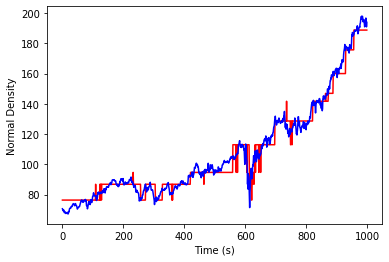

In [28]:
## here
fuzzyinput_col_names=['var1cluster1','var1cluster2','var1cluster3','var1cluster4','var1cluster5','var1cluster6','var1cluster7','var1cluster8','var1cluster9','var1cluster10',
                      'var2cluster1','var2cluster2','var2cluster3','var2cluster4','var2cluster5','var2cluster6','var2cluster7','var2cluster8','var2cluster9','var2cluster10',
                      'var3cluster1','var3cluster2','var3cluster3','var3cluster4','var3cluster5','var3cluster6','var3cluster7','var3cluster8','var3cluster9','var3cluster10',
                      'var4cluster1','var4cluster2','var4cluster3','var4cluster4','var4cluster5','var4cluster6','var4cluster7','var4cluster8','var4cluster9','var4cluster10',
                     'outputvalue']
x=[]
f = open("cluster_dct.txt", "w")
f.write(str(num_input))
f.write(str(output_cluster))
f.write("\n")
f.close()

fd = open("mf_dct.txt", "w")
fd.close()

for i in range(num_var):
    initNN(i)

with open('mf_dct.txt', 'r') as f:
    i = f.read().split()
    for elem in i:
        try:
            x.append(float(elem))
        except ValueError:
            pass
print(len(x))

ruleCount=0
rules=[[-1 for i in range(num_var+1)] for j in range(pow(output_cluster,num_var))]

Outmf = [[0 for i in range(discreteSamplePoints)] for j in range(output_cluster+1)]


# Create fuzzytrain_ltsm
temp = np.array([[0.0 for i in range(train_num_line)] for j in range(num_input*output_cluster+1)]).T
# Array to dataframe :
fuzzytrain_ltsm = pd.DataFrame(temp,columns=fuzzyinput_col_names)

# Create fuzzytest_ltsm
temp = np.array([[0.0 for i in range(test_num_line)] for j in range(num_input*output_cluster+1)]).T
# Array to dataframe :
fuzzytest_ltsm = pd.DataFrame(temp,columns=fuzzyinput_col_names)


initNN1(x)

In [29]:
outputCluster

[76.323938,
 86.789813,
 94.639219,
 112.954499,
 128.653311,
 141.735655,
 146.968592,
 160.050935,
 175.749747,
 188.832091]

In [30]:
## LTSM ##

In [31]:
trainX=[]
trainY=[]

n_future=step
n_past=10

for i in range(n_past, len(data_train.values) - n_future +1):
    trainX.append(data_train.values[i - n_past:i, 0:num_input])
    trainY.append(data_train.values[i-1:i, num_var-1])
trainX, trainY = np.array(trainX, dtype=np.float), np.array(trainY, dtype=np.float)
# trainX

In [32]:
testX=[]
testY=[]

n_future=step
n_past=10

for i in range(n_past, len(data_test.values) - n_future +1):
    testX.append(data_test.values[i - n_past:i, 0:num_input])
    testY.append(data_test.values[i-1:i, num_var-1])

testX, testY = np.array(testX, dtype=np.float), np.array(testY, dtype=np.float)
# testY

In [33]:
model = Sequential()
# softplus- Nadam // selu - Adagrad,Adam
model.add(LSTM(200,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(LSTM(200,activation='relu',return_sequences=True))
model.add(LSTM(200,activation='relu',return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='Adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 200)           164000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 200)           320800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 805,801
Trainable params: 805,801
Non-trainable params: 0
_________________________________________________________________


In [34]:
##TRAINING DATA
history=model.fit(trainX,trainY, epochs=100, batch_size=32,validation_split=0.1,verbose=1)
forecast = model.predict(testX) #forecast

Epoch 1/100
28/28 [==============================] - 22s 86ms/step - loss: 2324.5839 - val_loss: 18.8123
Epoch 2/100
28/28 [==============================] - 1s 32ms/step - loss: 30.6368 - val_loss: 33.4904
Epoch 3/100
28/28 [==============================] - 1s 30ms/step - loss: 29.6950 - val_loss: 43.3773
Epoch 4/100
28/28 [==============================] - 1s 31ms/step - loss: 31.2835 - val_loss: 15.1008
Epoch 5/100
28/28 [==============================] - 1s 32ms/step - loss: 25.1615 - val_loss: 35.7838
Epoch 6/100
28/28 [==============================] - 1s 30ms/step - loss: 29.0871 - val_loss: 27.6508
Epoch 7/100
28/28 [==============================] - 1s 31ms/step - loss: 33.4976 - val_loss: 28.5039
Epoch 8/100
28/28 [==============================] - 1s 32ms/step - loss: 35.9119 - val_loss: 86.7834
Epoch 9/100
28/28 [==============================] - 1s 30ms/step - loss: 31.0915 - val_loss: 48.0351
Epoch 10/100
28/28 [==============================] - 1s 31ms/step - loss: 27.6

28/28 [==============================] - 1s 29ms/step - loss: 16.4044 - val_loss: 24.0826
Epoch 81/100
28/28 [==============================] - 1s 30ms/step - loss: 18.9791 - val_loss: 13.8477
Epoch 82/100
28/28 [==============================] - 1s 30ms/step - loss: 18.7671 - val_loss: 22.1303
Epoch 83/100
28/28 [==============================] - 1s 36ms/step - loss: 15.2716 - val_loss: 14.5536
Epoch 84/100
28/28 [==============================] - 1s 35ms/step - loss: 16.5340 - val_loss: 30.6621
Epoch 85/100
28/28 [==============================] - 1s 34ms/step - loss: 24.5020 - val_loss: 15.1068
Epoch 86/100
28/28 [==============================] - 1s 37ms/step - loss: 20.4001 - val_loss: 35.3686
Epoch 87/100
28/28 [==============================] - 1s 36ms/step - loss: 17.7100 - val_loss: 32.9541
Epoch 88/100
28/28 [==============================] - 1s 34ms/step - loss: 18.6629 - val_loss: 18.1202
Epoch 89/100
28/28 [==============================] - 1s 42ms/step - loss: 16.0478 - v

In [35]:
time=[0]*len(forecast)
f = open("result_pure_lstm.txt", "w")
    
print("\npredicted vs actual output")
f.write("predicted vs actual output\n")
for i in range(len(forecast)):
    print(" ", '{0:.2f}'.format(forecast[i][0]),"  ",'{0:.2f}'.format(testY[i][0]))
    f.write(str( '{0:.2f}'.format(forecast[i][0])))
    f.write("  ")
    f.write(str('{0:.2f}'.format(testY[i][0])))
    f.write("\n")
    time[i]=i


predicted vs actual output
  71.54    68.55
  71.34    67.60
  71.82    67.46
  72.35    67.51
  71.92    67.57
  70.61    67.80
  70.49    67.58
  70.81    68.29
  70.40    67.57
  69.88    67.17
  69.71    67.21
  70.08    67.88
  70.07    68.81
  70.37    68.66
  70.44    70.38
  70.33    70.90
  69.86    70.86
  69.87    70.90
  69.98    70.88
  70.48    71.76
  70.88    72.08
  71.78    72.02
  72.67    72.09
  73.13    72.08
  73.18    73.11
  73.22    73.32
  73.78    73.88
  74.25    73.97
  74.43    73.66
  74.37    73.27
  74.55    73.09
  74.36    72.60
  75.11    73.52
  75.40    73.93
  75.49    73.98
  75.60    72.99
  75.00    72.65
  74.84    72.69
  74.23    72.18
  74.71    71.38
  75.81    70.38
  75.77    70.71
  75.29    71.36
  74.85    71.40
  74.65    71.59
  74.31    71.90
  73.79    72.05
  73.06    71.97
  72.57    72.83
  72.75    73.80
  73.08    74.28
  73.54    74.99
  73.68    75.18
  73.94    76.18
  74.12    75.46
  74.48    76.37
  75.19    75.42
  7

  167.77    167.07
  167.93    169.22
  168.81    167.90
  169.38    167.96
  170.06    168.12
  169.52    167.90
  169.80    172.48
  171.01    174.68
  172.06    175.81
  172.32    176.87
  172.69    179.30
  172.83    175.32
  173.23    178.29
  174.77    178.21
  175.83    177.48
  176.94    177.32
  178.02    177.59
  179.19    176.63
  179.40    176.37
  180.54    175.32
  181.75    175.55
  182.52    177.40
  183.36    175.88
  183.91    175.68
  184.05    173.61
  183.94    175.29
  182.77    179.16
  183.07    178.60
  183.58    177.60
  183.40    178.16
  182.82    178.06
  181.42    176.67
  181.82    180.41
  183.51    185.77
  183.98    184.84
  183.16    187.25
  183.77    186.07
  184.24    185.18
  183.45    185.03
  184.75    186.17
  186.20    186.22
  187.75    187.92
  188.81    188.16
  189.00    188.84
  189.87    188.17
  190.56    188.21
  191.27    188.17
  191.83    188.35
  193.44    188.80
  194.58    189.57
  194.88    190.47
  195.04    191.65
  195.11    

In [36]:
fuzzyvalue=[0]*len(forecast)
for i in range(len(forecast)):
    temp=0
    index=0
    for j in range(len(outputCluster)):
        if temp == 0:
            temp=abs(forecast[i]-outputCluster[j])
            index=j
        elif abs(forecast[i]-outputCluster[j]) < temp:
            temp=abs(forecast[i]-outputCluster[j])
            index=j
    if j == len(outputCluster)-1:
        fuzzyvalue[i]=outputCluster[index]


predicted vs actual output
  76.32    68.55
  76.32    67.60
  76.32    67.46
  76.32    67.51
  76.32    67.57
  76.32    67.80
  76.32    67.58
  76.32    68.29
  76.32    67.57
  76.32    67.17
  76.32    67.21
  76.32    67.88
  76.32    68.81
  76.32    68.66
  76.32    70.38
  76.32    70.90
  76.32    70.86
  76.32    70.90
  76.32    70.88
  76.32    71.76
  76.32    72.08
  76.32    72.02
  76.32    72.09
  76.32    72.08
  76.32    73.11
  76.32    73.32
  76.32    73.88
  76.32    73.97
  76.32    73.66
  76.32    73.27
  76.32    73.09
  76.32    72.60
  76.32    73.52
  76.32    73.93
  76.32    73.98
  76.32    72.99
  76.32    72.65
  76.32    72.69
  76.32    72.18
  76.32    71.38
  76.32    70.38
  76.32    70.71
  76.32    71.36
  76.32    71.40
  76.32    71.59
  76.32    71.90
  76.32    72.05
  76.32    71.97
  76.32    72.83
  76.32    73.80
  76.32    74.28
  76.32    74.99
  76.32    75.18
  76.32    76.18
  76.32    75.46
  76.32    76.37
  76.32    75.42
  7

  94.64    94.43
  94.64    95.62
  94.64    96.35
  94.64    95.42
  94.64    95.00
  94.64    95.13
  94.64    95.40
  94.64    95.68
  94.64    95.23
  94.64    94.94
  94.64    98.29
  94.64    97.98
  94.64    95.49
  94.64    95.78
  94.64    95.70
  94.64    97.08
  94.64    96.79
  94.64    96.27
  94.64    95.65
  94.64    95.48
  94.64    96.94
  94.64    97.53
  94.64    97.66
  94.64    99.47
  94.64    99.39
  94.64    100.19
  94.64    100.18
  94.64    100.50
  94.64    101.48
  94.64    101.94
  94.64    102.55
  94.64    101.62
  94.64    101.26
  94.64    101.52
  94.64    101.70
  94.64    101.14
  94.64    101.67
  94.64    101.34
  94.64    101.36
  94.64    102.07
  94.64    101.55
  94.64    102.09
  94.64    101.52
  94.64    101.49
  94.64    100.79
  94.64    101.48
  94.64    101.82
  94.64    102.53
  94.64    103.31
  94.64    103.23
  94.64    104.30
  94.64    104.86
  94.64    104.45
  94.64    103.98
  94.64    105.05
  112.95    105.24
  112.95    104.

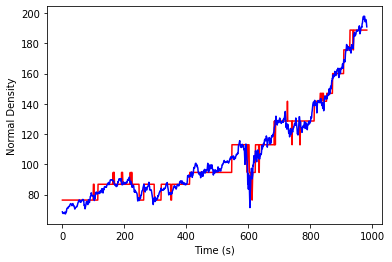

In [37]:
time=[0]*len(forecast)
f = open("result_fuzzy_lstm.txt", "w")
    
print("\npredicted vs actual output")
f.write("predicted vs actual output\n")
for i in range(len(forecast)):
    print(" ", '{0:.2f}'.format(fuzzyvalue[i]),"  ",'{0:.2f}'.format(testY[i][0]))
    f.write(str( '{0:.2f}'.format(fuzzyvalue[i])))
    f.write("  ")
    f.write(str('{0:.2f}'.format(testY[i][0])))
    f.write("\n")
    time[i]=i

from matplotlib import pyplot as plt
plt.plot(time, fuzzyvalue, 'r-')
plt.plot(time, testY, 'b-')
plt.xlabel("Time (s)")
plt.ylabel("Normal Density")
    
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(testY, fuzzyvalue)
print("RMSE = ",rms)
f.write("RMSE = ")
f.write(str(rms))
TestR2Value = r2_score(testY,fuzzyvalue)
print("Testing Set R-Square=", TestR2Value)
f.write("R-Square=")
f.write(str(TestR2Value))
f.close()

In [38]:
## look ahead strategy

In [39]:
## use ga to find best look ahead period
predictedClose=fuzzyvalue
actualClose=testY
totalcash=100000
risk=0.9

In [40]:
def test(x):
    a=int(x[0])
    b=int(x[1])
    print("a: ",a," b: ",b)
    
    cash = totalcash
    leverageN=0
    leverageAmt=risk*totalcash*0.1
    tempq=0
    q=0
    
    for i in range(len(forecast)):
#         print(i)
        if i < (len(forecast))-a and i < (len(forecast))-b:

            ## buy - if LARGE
            if ((predictedClose[i+a]>predictedClose[i]) 
                and ((cash*risk)+leverageAmt)>actualClose[i]
                and (cash*risk>actualClose[i])):
                tempq = (((cash*risk)+leverageAmt)/data_train['Close'][i])
                tempq = math.floor(tempq)
                cash = (cash-(tempq * data_train['Close'][i]))+leverageAmt
                q = tempq + q
                leverageN=leverageN+1
#                 print("BOUGHT")

            ## sell - if LOW
            elif ((predictedClose[i+b]<predictedClose[i]) and q!=0):
                cash = (q * actualClose[i][0]) + cash
                q = 0
#                 print("SOLD")

        if (i == len(forecast) - 1):
            leverageFee=(leverageAmt*leverageN)
            for j in range(4):
                leverageFee=(leverageFee*1.06)
            print("total assets:", cash + (q * actualClose[i][0]) - leverageFee)
            return -(cash + (q * actualClose[i][0]))

a:  5  b:  2
total assets: 509397.4986214917
a:  2  b:  3
total assets: 412408.4541851537
a:  1  b:  1
total assets: 422167.27914403804
a:  4  b:  1
total assets: 574281.8284970531
a:  5  b:  3
total assets: 495615.5260907421
a:  5  b:  5
total assets: 415749.4186744384
a:  4  b:  3
total assets: 498377.9460181884
a:  5  b:  4
total assets: 480853.7405031298
a:  7  b:  5
total assets: 472044.41729908925
a:  6  b:  3
total assets: 490081.1647147826
a:  4  b:  1
total assets: 574281.8284970531
a:  2  b:  2
total assets: 455250.4358530907
a:  5  b:  1
total assets: 562264.8490201244
a:  2  b:  5
total assets: 369229.10429280513
a:  4  b:  4
total assets: 506839.3442400072
a:  4  b:  3
total assets: 498377.9460181884
a:  6  b:  7
total assets: 287434.26622181875
a:  2  b:  7
total assets: 284159.1266608178
a:  5  b:  5
total assets: 415749.4186744384
a:  2  b:  3
total assets: 412408.4541851537
a:  3  b:  6
total assets: 343929.9376057934
a:  4  b:  6
total assets: 341006.25613507314
a:  4

a:  4  b:  2
total assets: 532850.4614732836
a:  4  b:  2
total assets: 532850.4614732836
a:  2  b:  1
total assets: 409001.9543155395
a:  4  b:  2
total assets: 532850.4614732836
a:  4  b:  4
total assets: 506839.3442400072
a:  4  b:  5
total assets: 432323.59917759756
a:  7  b:  2
total assets: 551203.1823914037
a:  4  b:  4
total assets: 506839.3442400072
a:  3  b:  2
total assets: 547926.4620295434
a:  6  b:  2
total assets: 509304.3516710375
a:  4  b:  5
total assets: 432323.59917759756
a:  6  b:  5
total assets: 414447.0160928052
a:  7  b:  5
total assets: 472044.41729908925
a:  4  b:  2
total assets: 532850.4614732836
a:  2  b:  7
total assets: 284159.1266608178
a:  4  b:  7
total assets: 296085.83695393545
a:  4  b:  7
total assets: 296085.83695393545
a:  7  b:  3
total assets: 611685.5506553344
a:  4  b:  1
total assets: 574281.8284970531
a:  4  b:  7
total assets: 296085.83695393545
a:  7  b:  3
total assets: 611685.5506553344
a:  6  b:  5
total assets: 414447.0160928052
a:  

a:  7  b:  5
total assets: 472044.41729908925
a:  7  b:  5
total assets: 472044.41729908925
a:  5  b:  3
total assets: 495615.5260907421
a:  2  b:  5
total assets: 369229.10429280513
a:  7  b:  3
total assets: 611685.5506553344
a:  4  b:  5
total assets: 432323.59917759756
a:  7  b:  2
total assets: 551203.1823914037
||||||||||________________________________________ 20.8% GA is running...a:  4  b:  3
total assets: 498377.9460181884
a:  7  b:  3
total assets: 611685.5506553344
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  5
total assets: 472044.41729908925
a:  1  b:  1
total assets: 422167.27914403804
a:  4  b:  1
total assets: 574281.8284970531
a:  4  b:  5
total assets: 432323.59917759756
a:  7  b:  3
total assets: 611685.5506553344
a:  6  b:  3
total assets: 490081.1647147826
a:  4  b:  3
total assets: 498377.9460181884
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  3
total a

a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  3
total assets: 498377.9460181884
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  6
total assets: 488583.95745053457
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  3  b:  1
total assets: 563273.3900552075
a:  7  b:  3
total assets: 611685.5506553344
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  7
total assets: 437324.66377362295
a:  4  b:  3
total assets: 498377.9460181884
a:  7  b:  3
total assets: 611685.5506553344
a:  7  b:  2
total assets: 551203.1823914037
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  3
total assets: 498377.9460181884
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b

|||||||||||||||||||||_____________________________ 41.7% GA is running...a:  4  b:  1
total assets: 574281.8284970531
a:  1  b:  1
total assets: 422167.27914403804
a:  4  b:  1
total assets: 574281.8284970531
a:  4  b:  1
total assets: 574281.8284970531
a:  4  b:  3
total assets: 498377.9460181884
a:  7  b:  3
total assets: 611685.5506553344
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  3
total assets: 611685.5506553344
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  6
total assets: 341006.25613507314
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  3  b:  1
total assets: 563273.3900552075
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  7
total assets: 437324.66377362295
a:  7  b:  1
total asset

a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  3  b:  1
total assets: 563273.3900552075
a:  4  b:  1
total assets: 574281.8284970531
a:  4  b:  1
total assets: 574281.8284970531
a:  4  b:  7
total assets: 296085.83695393545
a:  4  b:  1
total assets: 574281.8284970531
a:  4  b:  2
total assets: 532850.4614732836
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  5
total assets: 472044.41729908925
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b

a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  5  b:  1
total assets: 562264.8490201244
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  6  b:  1
total assets: 563463.0973104539
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  1
total assets: 604696.7747694848
a:  6  b:  1
total assets: 563463.0973104539
a:  5  b:  7
total assets: 275326.9188998901
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  5
total assets: 472044.41729908925
a:  6  b:  1
total assets: 563463.0973104539
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:

total assets: 562264.8490201244
a:  5  b:  1
total assets: 562264.8490201244
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  5
total assets: 472044.41729908925
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  4  b:  1
total assets: 574281.8284970531
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  2  b:  1
total assets: 409001.9543155395
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  5
total assets: 472044.41729908925
a:  7  b:  2
total assets: 551203.1823914037
||||||||||||||||||||||||||||||||||||||____________ 75.0% GA is running...a:  5  b:  3
total assets: 495615.5260907421
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  4
total assets: 516064.8648

a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  4
total assets: 516064.864847688
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  5  b:  1
total assets: 562264.8490201244
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  2
total assets: 551203.1823914037
a:  7  b:  7
total assets: 437324.66377362295
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  7
total assets: 437324.66377362295
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  5
total assets: 472044.41729908925
a:  5  b:  1
total assets: 562264.8490201244
a:  4  b

a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  1
total assets: 604696.7747694848
||||||||||||||||||||||||||||||||||||||||||||||||__ 95.8% GA is running...a:  4  b:  1
total assets: 574281.8284970531
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  1
total assets: 604696.7747694848
a:  4  b:  1
total assets: 574281.8284970531
a:  7  b:  1
total assets: 604696.7747694848
a:  7  b:  1
total assets: 

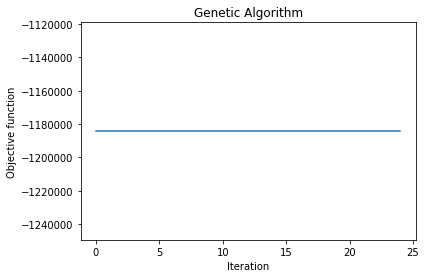

In [41]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
varbound=np.array([[1,step],[1,step]])
vartype=np.array([['int'],['int']])

ga_model=ga(function=test,dimension=2,variable_type_mixed=vartype,variable_boundaries=varbound,function_timeout=500)

ga_model.run()

f.close()